In [1]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [2]:
!nvidia-smi

Thu Mar 25 09:29:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 27%   36C    P8    24W / 250W |     10MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 28%   38C    P8    16W / 250W |     10MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
import torch
torch.cuda.set_device(1)

In [4]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [5]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [6]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [7]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest50d_4'),
    MixUp(),
]

In [8]:
learn = timm_learner(dls512, 'resnest50d_4s2x40d',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

In [9]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.118582,0.784208,0.631261,0.812500,0.408530,01:21


Better model found at epoch 0 with valid_loss value: 0.7842081189155579.


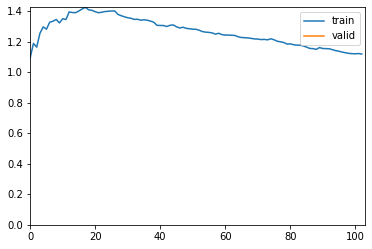

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.949957,0.727227,0.660229,0.810606,0.480359,01:28
1,0.949633,0.719661,0.659022,0.818359,0.470258,01:25
2,0.923571,0.679419,0.663247,0.801085,0.497194,01:26
3,0.918035,0.624165,0.682559,0.780338,0.570146,01:25
4,0.913453,0.649890,0.678334,0.793443,0.543210,01:26
5,0.916977,0.623660,0.681955,0.787066,0.560045,01:27
6,0.871760,0.648212,0.682559,0.807757,0.537598,01:28
7,0.887741,0.614194,0.701871,0.828099,0.562290,01:28
8,0.878171,0.541738,0.726011,0.773467,0.693603,01:28
9,0.856879,0.582736,0.710320,0.809955,0.602694,01:27


Better model found at epoch 0 with valid_loss value: 0.7272265553474426.


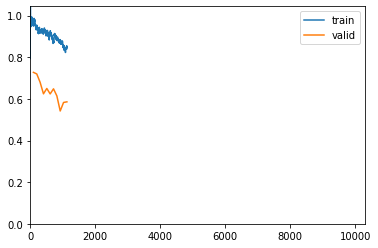

Better model found at epoch 1 with valid_loss value: 0.7196612358093262.
Better model found at epoch 2 with valid_loss value: 0.6794188022613525.
Better model found at epoch 3 with valid_loss value: 0.6241649389266968.
Better model found at epoch 5 with valid_loss value: 0.6236603260040283.
Better model found at epoch 7 with valid_loss value: 0.6141937375068665.
Better model found at epoch 8 with valid_loss value: 0.5417380928993225.
No improvement since epoch 8: early stopping


In [10]:
learn.fine_tune(100,base_lr=1e-4)

In [11]:
path = Path('dataset/')
trainPath = path/'train'
testPath = path/'test'

In [12]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [13]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [14]:
learn.freeze()

In [15]:
learn.dls=dls512

In [12]:
#learn.load('hrnet')

/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.6309573650360107)

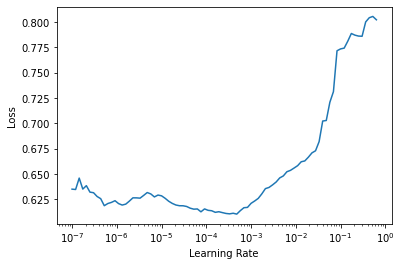

In [16]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.100750,0.736729,0.603976,0.619433,0.481132,00:21


Better model found at epoch 0 with valid_loss value: 0.7367292642593384.


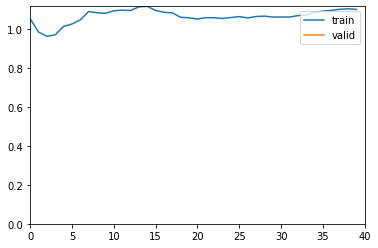

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.101475,0.742101,0.584098,0.589844,0.474843,00:25
1,1.108410,0.746934,0.581040,0.583333,0.484277,00:25
2,1.074369,0.741451,0.584098,0.600000,0.433962,00:25
3,1.069500,0.742888,0.596330,0.620536,0.437107,00:25
4,1.083975,0.741404,0.581040,0.588000,0.462264,00:25
5,1.077225,0.736082,0.577982,0.580769,0.474843,00:25
6,1.080924,0.730537,0.587156,0.593023,0.481132,00:25
7,1.057355,0.743279,0.571865,0.568345,0.496855,00:25
8,1.045525,0.724194,0.588685,0.586572,0.522013,00:25
9,1.023346,0.730947,0.577982,0.584000,0.459119,00:25


Better model found at epoch 0 with valid_loss value: 0.7421008944511414.


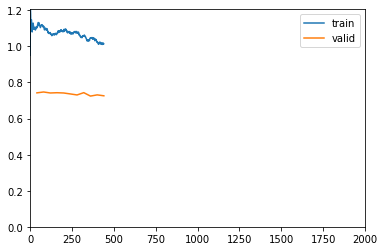

Better model found at epoch 2 with valid_loss value: 0.7414513230323792.
Better model found at epoch 4 with valid_loss value: 0.7414035797119141.
Better model found at epoch 5 with valid_loss value: 0.7360818982124329.
Better model found at epoch 6 with valid_loss value: 0.7305374145507812.
Better model found at epoch 8 with valid_loss value: 0.7241936326026917.
No improvement since epoch 8: early stopping


In [14]:
learn.fine_tune(50,base_lr=1e-5)

In [16]:
learn.dls = dlsTest

In [17]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5806846022605896.


(#4) [0.7372969388961792,0.5806846022605896,0.5995670995670995,0.6367816091954023]